In [ ]:
!pip install kmapper

     |████████████████████████████████| 102kB 6.7MB/s 


In [ ]:
!pip install -U pillow

     |████████████████████████████████| 2.2MB 13.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [ ]:
!pip install -U scipy==1.2.0

     |████████████████████████████████| 26.6MB 112kB/s 
ERROR: umap-learn 0.4.4 has requirement scipy>=1.3.1, but you'll have scipy 1.2.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.2.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
import io
import sys
import base64

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
import kmapper as km

In [ ]:
from scipy.misc import imsave, toimage

In [ ]:

try:
    from scipy.misc import imsave, toimage
except ImportError as e:
    print("imsave requires you to install pillow. Run `pip install pillow` and then try again.")
    sys.exit()


# Load digits dat
data, labels = datasets.load_digits().data, datasets.load_digits().target

# Create images for a custom tooltip array
tooltip_s = []
for image_data in data:
    output = io.BytesIO()
    img = toimage(image_data.reshape((8, 8)))  # Data was a flat row of 64 "pixels".
    img.save(output, format="PNG")
    contents = output.getvalue()
    img_encoded = base64.b64encode(contents)
    img_tag = """<img src="data:image/png;base64,{}">""".format(img_encoded.decode('utf-8'))
    tooltip_s.append(img_tag)
    output.close()

tooltip_s = np.array(tooltip_s)  # need to make sure to feed it as a NumPy array, not a list



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  app.launch_new_instance()


In [ ]:
len(img_encoded)

164

In [ ]:
# %tb
np.shape(tooltip_s)

(1797,)

In [ ]:
# tooltip_s

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (1797, 64)

..Projecting data using: 
	TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.012s...
[t-SNE] Computed neighbors for 1797 samples in 0.386s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditio

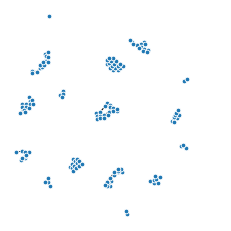

In [ ]:
# Initialize to use t-SNE with 2 components (reduces data to 2 dimensions). Also note high overlap_percentage.
mapper = km.KeplerMapper(verbose=2)

# Fit and transform data
projected_data = mapper.fit_transform(data,
                                      projection=sklearn.manifold.TSNE())

# Create the graph (we cluster on the projected data and suffer projection loss)
graph = mapper.map(projected_data,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=15),
                   cover=km.Cover(35, 0.4))

# Create the visualizations (increased the graph_gravity for a tighter graph-look.)
print("Output graph examples to html" )
# Tooltips with image data for every cluster member
mapper.visualize(graph,
                 title="Handwritten digits Mapper",
                 path_html="/content/drive/My Drive/Topology/digits_custom_tooltips.html",
                 color_function=labels,
                 custom_tooltips=tooltip_s)
# Tooltips with the target y-labels for every cluster member
mapper.visualize(graph,
                 title="Handwritten digits Mapper",
                 path_html="/content/drive/My Drive/Topology/digits_ylabel_tooltips.html",
                 custom_tooltips=labels)

# Matplotlib examples
km.draw_matplotlib(graph)
plt.show()

In [ ]:
import cv2
from imutils import paths
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
import os
from matplotlib.patches import Rectangle
import seaborn as sns
import cv2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
path_to_images='/content/drive/My Drive/Topology/benign/'
print("[INFO] loading images...")
imagePaths = list(paths.list_images(path_to_images))
data = []
labels = []
print(imagePaths)

[INFO] loading images...
['/content/drive/My Drive/Topology/benign/99f915cfee5322e33682f300f4967537aaa263ca.tif', '/content/drive/My Drive/Topology/benign/581843e451ccc416f82c418de0696569b0200170.tif', '/content/drive/My Drive/Topology/benign/5583719dd5db26ca643372ddcf61ec19782dd49e.tif', '/content/drive/My Drive/Topology/benign/b5a60a14eacd6e81ca161009c60addd0258ad4e2.tif', '/content/drive/My Drive/Topology/benign/6110c973eebe6e2f53b427fb0a6b38052bab7fbf.tif', '/content/drive/My Drive/Topology/benign/93ba83b4d29709363feaaf2616ffe23dfafaa601.tif', '/content/drive/My Drive/Topology/benign/a0bbe731d361594435c48a6337a6d885612860bc.tif', '/content/drive/My Drive/Topology/benign/84cfc51c5b7def88855e4860cc6b04357c6f6e20.tif', '/content/drive/My Drive/Topology/benign/44e3ca46b1ad23e1cc7963c886ba7ffd8db5a9d7.tif', '/content/drive/My Drive/Topology/benign/5deb0de6e8af1120357be61d8c43ca9388ebafe6.tif', '/content/drive/My Drive/Topology/benign/bc40e3f5692800f59d23dba2d571590cfb46b1ff.tif', '/cont

In [ ]:
benign=pd.DataFrame()

In [ ]:
labels = []
for imagePath in imagePaths:
  # label=imagePath.split(os.path.sep)[-2]
  # print(label)
  column_name=imagePath.split('/')[-1].split('.')[0]
  # print(column_name)
  # print(type(column_name))
  image=cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # print(image.shape)
  image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # image=cv2.resize(image, (128, 128),interpolation=cv2.INTER_AREA)
  benign[column_name]= image.flatten()
  # image=image.flatten()
  # print(image.shape)
  # image=np.array(image).ravel()
  # print(image.shape)
  labels.append('0')

In [ ]:
benign.shape

(9216, 1000)

In [ ]:
benign.head()

,99f915cfee5322e33682f300f4967537aaa263ca,581843e451ccc416f82c418de0696569b0200170,5583719dd5db26ca643372ddcf61ec19782dd49e,b5a60a14eacd6e81ca161009c60addd0258ad4e2,6110c973eebe6e2f53b427fb0a6b38052bab7fbf,93ba83b4d29709363feaaf2616ffe23dfafaa601,a0bbe731d361594435c48a6337a6d885612860bc,84cfc51c5b7def88855e4860cc6b04357c6f6e20,44e3ca46b1ad23e1cc7963c886ba7ffd8db5a9d7,5deb0de6e8af1120357be61d8c43ca9388ebafe6,bc40e3f5692800f59d23dba2d571590cfb46b1ff,aff23152c25a9375bf59b9b0cdbaca93b74b1daf,53db16cb59fc6f51c3df9c4d6b66e2c4e4ce7484,1fbd6089f76e9efdaae644dd0d990999a10e9364,2872a8cec57d6acd49a76dc6800ee1a15a111b9b,516b475528ef1948f59c215188161f167c69ea2c,5ca326b68877a675b11f85f84bc2a2eff6a89c17,8a89a07d7ec869d74bd5b96a4ad04d28c3e20121,b2691b19fb0dc55eee257d014a42db06cc8a83bb,8d843e1d257bd03e2a34d70e3659fdb3f838ba61,53c0659847c8fbb2be85028d9bd244b9de27e027,267be35c4255d3cebca7ae2eff8ce43f365aa402,32bcff6b2ec84d3f0edf5e7ecd8336e6419553e7,4f51d1e0aac37bee5c9215373f9dcc010ef49a29,23d93c312a807fd9c09011fd000c9fc3a2b86f1d,0e8fd56f9e82b8aa8eaacd2ec40c3f644209dd82,002f01b9eae989b38b9b8412f52db284d25918b1,af9174a4d6be64c0d4a433d83c2008b9f36ef55c,61a0fd94ef1d05ff7b54fbb013963e6a7ed0871e,8bf7609c6fabbee33e312ae173a2548493fb7615,79ffa7f0a11926b2886cf28f019b32f07eff6fdf,52844246712d7f08de4ea8e08cb0220dd259a2ed,b2ffe85a3c68d45998bfa66b33b247c6c163b103,2fbf7cf85ba382ba792e79b8936b14cfe66e7299,5898b3f84a5680cf87e1148306343d40e0e8baca,965d4aaa24b13544ef0146dfde8f9260d5ffe069,37a4d301015fa373fe4294ba7137593afedea92a,8ae073422a536a8c5571976b8ac33d58e3bfb1cd,66b9336d612b45ad263caed45485ee5d727672d1,8a84322e87e54fac805572a8ad772491e8aa3885,...,12fb02149057c2682eb5fc743316568e07fa3108,298fad3042b5425061005c49797c88bfb1bc50b5,1f2e94707c966a2d60e1fae33e5a7f88d9a073e6,37fe172ec73c8c5eb62d569df1cfd364db8d2e34,37965626bea0503debab7142929187629cec0102,279ddfad97e341c75f896fb925dd36d0ceae25d5,5606580d2172a9cf6da8f99df2517df93f2ad98b,7df0e73d1e819c513f026c562f7a7f4e21be7a8c,039f22a07e3247607718db805b4c01f16e74670b,0815b40c88371777908f48231ea77d37e3ff2319,72a2d8daa047c6b52910ba08c27bb3fd5650322f,499fd93ffb72d8be0068af435b5072726b2057bd,6d0c3d0bd0780d65ac84f67dab20724f4aadfe19,7312006e3ca12c9b835c4b842ed7d22434176cf0,158389bc126730856590c5443d514a9464b6303f,4cf7eaf3ca19a62b5eab2cf93ffecb4e63ca17c2,1ef573185a03c8e60952ae21b1651ccbda44680b,9a7eb5cb94195c4269b132519120ce6d24fbe492,517e1ab7a91f36195a52b2ed2f2fec0c267bafca,445871acdcf326a1e817b03c6dbd068ceb1500f0,674bdaa13488c9dae7b0591da629107270f3f657,4cd9bcfc2ed11df4c088f926c75b3fa1fceee1d6,243fb847d7e70f11f03bd7e8939127285b1ad01c,a017330da2b6067d336c52c7c37f0de17caf673e,121161a751c4f5ba17bfc7aaa859faa4843eceb2,1e46e949f51c3adbe0592f69b5f344e3dddc2dfb,1d97b9406906b1fad62de206c31ebef2daa10182,5e430aae5b7fc1386a6d4efe004abe204368661a,9d394bd067b0b97ca1fd5d1c098ebeb3f5ef0f70,99161125d82dea3fcf65d240ee7e0a6231707f5a,2d40ac24d34ce63ea4ced0c747a877797099d683,70b7e684fbd484fd164dbb1498bb0d9b13f8fd22,b6abaaeb5e06b0b10bb3aeb04c3d33adcb7e7504,1892dd18e196e7a978ab97f6d9ecbbd5c07a6cfd,695f6d969c59dbf8bf879cf433214ed87bf4e640,a07706acbd5263b444a50bfb3af60acb74fee4be,22462f55502909a90e0f43f8be2f1158cc740380,142153d824c99b96ea2e7a191bc53a2af44b3d19,77cbf0405bc16736c42333862df9c58565175a14,12d5532f2527ca607b91622edc83b370f7c17fcf
0,227,240,210,50,179,239,76,123,247,39,248,161,67,208,86,23,137,216,252,201,140,174,126,46,193,65,177,131,212,60,106,84,158,149,82,117,146,230,79,38,...,160,216,181,145,233,170,206,159,202,234,53,234,172,73,119,154,32,223,222,239,117,76,115,244,239,234,252,159,130,200,93,236,244,153,171,224,223,197,210,209
1,175,241,203,86,175,233,63,120,253,54,248,173,37,204,126,31,89,170,253,236,169,175,129,102,252,80,167,56,219,19,118,83,133,202,168,84,118,229,35,65,...,229,219,215,195,199,70,209,182,140,234,203,234,205,139,56,74,84,223,222,239,95,95,95,239,239,253,255,147,64,99,142,236,244,135,176,225,202,203,207,213
2,174,242,217,134,105,246,54,73,247,54,248,207,48,181,86,42,82,140,253,225,174,176,211,95,247,64,154,56

In [ ]:
X= benign.transpose()

In [ ]:
benign=benign.transpose()

In [ ]:
benign['label']=labels

In [ ]:
X.shape

(1000, 9216)

In [ ]:
# Initialize to use t-SNE with 2 components (reduces data to 2 dimensions). Also note high overlap_percentage.
mapper = km.KeplerMapper(verbose=2)

# Fit and transform data
projected_data = mapper.fit_transform(X,
                                      projection=sklearn.manifold.TSNE())

# Create the graph (we cluster on the projected data and suffer projection loss)
graph = mapper.map(projected_data,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=15),
                   cover=km.Cover(35, 0.4))

# Create the visualizations (increased the graph_gravity for a tighter graph-look.)
print("Output graph examples to html" )
# Tooltips with image data for every cluster member
# mapper.visualize(graph,
#                  title="Breast Cancer Mapper",
#                  path_html="/content/drive/My Drive/Topology/breast_cancer_0.html",
#                  color_function=labels,
#                  custom_tooltips=tooltip_s)


KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (1000, 9216)

..Projecting data using: 
	TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.726s...
[t-SNE] Computed neighbors for 1000 samples in 21.402s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 13

Wrote visualization to: /content/drive/My Drive/Topology/breast_cancer_ylabel_tooltips_benign.html


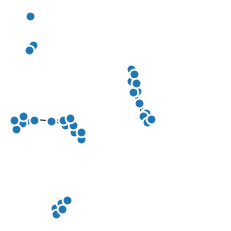

In [ ]:
# Tooltips with the target y-labels for every cluster member
mapper.visualize(graph,
                 title="Breast Cancer Mapper with Benign Labels ",
                 path_html="/content/drive/My Drive/Topology/breast_cancer_ylabel_tooltips_benign.html")
                #  custom_tooltips=labels)

# Matplotlib examples
km.draw_matplotlib(graph)
plt.show()

In [ ]:
path_2='/content/drive/My Drive/Topology/malignant'
imagePaths_2 = list(paths.list_images(path_2))
data_2 = []
labels_2 = []
print(imagePaths_2)
malignant=pd.DataFrame()

['/content/drive/My Drive/Topology/malignant/537627e0d74668002be3cc9b332b81bebf6cd72e.tif', '/content/drive/My Drive/Topology/malignant/676db411de6d7166ddde73b800509f810760127f.tif', '/content/drive/My Drive/Topology/malignant/1355cdbc8f4477ac380408717501354d036c6ded.tif', '/content/drive/My Drive/Topology/malignant/4739ea3b2ffbc7f83ab9b92d57264e55e3e40d6c.tif', '/content/drive/My Drive/Topology/malignant/36a0055e7bdaa060d8485f7057a6a3f99cedde8d.tif', '/content/drive/My Drive/Topology/malignant/7491adfa674fb57319284c1f885606abbcfd3638.tif', '/content/drive/My Drive/Topology/malignant/4d963a6f65e54428cbf684271a2ba27f02f59abd.tif', '/content/drive/My Drive/Topology/malignant/2e9d4cbc7d51892e316f21493c3b18a6a04ac2df.tif', '/content/drive/My Drive/Topology/malignant/4802f1466c64ba4fbf8a3a504b84bc5fbfb61563.tif', '/content/drive/My Drive/Topology/malignant/4960165d1fea5f8a1b33a43292c9e86f2f5f1e66.tif', '/content/drive/My Drive/Topology/malignant/8bd3e39902552b962f7f870d7dad45d47e4f2115.tif'

In [ ]:
labels_2 = []

for imagePath in imagePaths_2:
  # label=imagePath.split(os.path.sep)[-2]
  # print(label)
  column_name=imagePath.split('/')[-1]
  image=cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # print(image.shape)
  image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # image=cv2.resize(image, (300, 300),interpolation=cv2.INTER_AREA)
  malignant[column_name]=image.flatten()
  labels_2.append('1')

In [ ]:
X_mal=malignant.transpose()

In [ ]:
malignant=malignant.transpose()
malignant['label']=labels_2

In [ ]:
X_mal.shape

In [ ]:
# Initialize to use t-SNE with 2 components (reduces data to 2 dimensions). Also note high overlap_percentage.
mapper2 = km.KeplerMapper(verbose=2)

# Fit and transform data
projected_data2 = mapper2.fit_transform(X_mal,
                                      projection=sklearn.manifold.TSNE())

# Create the graph (we cluster on the projected data and suffer projection loss)
graph = mapper.map(projected_data2,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=15),
                   cover=km.Cover(35, 0.4))


KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (1000, 9216)

..Projecting data using: 
	TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.718s...
[t-SNE] Computed neighbors for 1000 samples in 20.919s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 13

Wrote visualization to: /content/drive/My Drive/Topology/breast_cancer_ylabel_tooltips_malignant.html


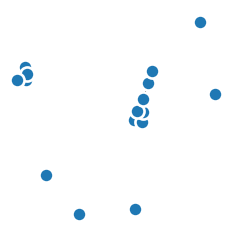

In [ ]:
# Tooltips with the target y-labels for every cluster member
mapper.visualize(graph,
                 title="Breast Cancer Mapper with Malignant Labels ",
                 path_html="/content/drive/My Drive/Topology/breast_cancer_ylabel_tooltips_malignant.html")
                #  custom_tooltips=labels)

# Matplotlib examples
km.draw_matplotlib(graph)
plt.show()

In [ ]:
df = pd.concat([benign, malignant])

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9177,9178,9179,9180,9181,9182,9183,9184,9185,9186,9187,9188,9189,9190,9191,9192,9193,9194,9195,9196,9197,9198,9199,9200,9201,9202,9203,9204,9205,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215,label
99f915cfee5322e33682f300f4967537aaa263ca,227,175,174,192,201,160,142,157,203,175,211,242,189,192,195,205,208,230,207,209,185,196,228,244,154,208,240,199,218,219,232,216,230,214,220,219,210,221,194,226,...,216,212,201,226,220,210,213,210,229,204,221,214,189,217,226,210,208,216,229,224,209,209,223,218,217,215,227,203,226,205,227,220,204,187,233,199,204,181,224,0
581843e451ccc416f82c418de0696569b0200170,240,241,242,242,240,240,240,241,244,244,245,245,244,243,241,240,238,236,234,232,231,228,225,223,220,217,214,212,210,207,204,202,202,201,200,199,198,197,197,196,...,241,240,239,238,238,238,238,239,239,239,238,238,238,238,237,238,238,238,238,238,239,239,239,241,240,238,237,237,238,240,241,240,240,239,239,238,237,237,236,0
5583719dd5db26ca643372ddcf61ec19782dd49e,210,203,217,228,218,219,187,218,202,201,203,207,235,253,247,249,250,255,254,249,251,253,252,254,218,232,243,223,217,226,218,220,180,186,188,231,241,206,211,225,...,200,168,170,219,206,236,224,244,206,237,170,161,207,236,104,121,175,197,235,183,243,231,247,123,122,211,180,220,160,83,112,156,167,241,238,213,211,251,225,0
b5a60a14eacd6e81ca161009c60addd0258ad4e2,50,86,134,62,50,66,159,190,76,79,95,27,240,70,83,108,119,77,55,59,96,161,205,212,222,232,197,172,150,109,101,96,99,145,178,111,105,114,119,54,...,120,140,108,53,100,126,164,132,123,86,87,184,245,170,180,165,122,73,74,65,58,71,101,172,82,196,216,183,174,171,162,96,129,145,131,132,120,140,159,0
6110c973eebe6e2f53b427fb0a6b38052bab7fbf,179,175,105,167,119,116,102,120,158,126,175,114,108,107,93,114,179,218,116,100,106,128,148,155,129,117,132,149,135,113,130,96,96,186,199,176,148,186,160,147,...,70,123,132,67,104,219,158,76,89,60,49,104,124,72,136,225,97,62,86,78,165,224,136,126,125,109,104,95,136,123,165,155,181,202,220,188,97,101,127,0


In [ ]:
df['label'].value_counts()

1    1000
0    1000
Name: label, dtype: int64

In [ ]:
Xtrain=df.drop(['label'],axis=1)

In [ ]:
Xtrain.shape

(2000, 9216)

In [ ]:
df.label.value_counts()

1    1000
0    1000
Name: label, dtype: int64

In [ ]:
PatientID=df.index

In [ ]:
np.shape(PatientID)

(2000,)

In [ ]:
# Initialize to use t-SNE with 2 components (reduces data to 2 dimensions). Also note high overlap_percentage.
mapper_full = km.KeplerMapper(verbose=2)

# Fit and transform data
projected_data_full = mapper_full.fit_transform(Xtrain,
                                      projection=sklearn.manifold.TSNE(n_components=2,perplexity=50))

# Create the graph (we cluster on the projected data and suffer projection loss)
graph_full = mapper_full.map(projected_data_full,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=15),
                   cover=km.Cover(35, 0.4))

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=50, random_state=None, verbose=0)
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (2000, 9216)

..Projecting data using: 
	TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=50, random_state=None, verbose=2)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2000 samples in 1.743s...
[t-SNE] Computed neighbors for 2000 samples in 83.833s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditio

Wrote visualization to: /content/drive/My Drive/Topology/breast_cancer_ylabel_images.html


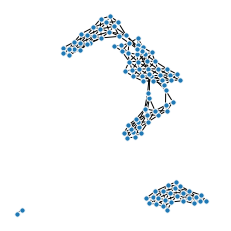

In [ ]:
# Tooltips with the target y-labels for every cluster member
mapper_full.visualize(graph_full,
                 title="Breast Cancer Mapper with  Labels ",
                 path_html="/content/drive/My Drive/Topology/breast_cancer_ylabel_images.html",
                 custom_tooltips=df.label)

# Matplotlib examples
km.draw_matplotlib(graph_full)
plt.show()